# Hochschule Bonn-Rhein-Sieg

# Learning and Adaptivity, SS18

# Assignment 03 (24-April-2018)

##  Sathiya Ramesh, Pradheep Krishna Muthukrishnan Padmanabhan, Naresh Kumar Gurulingan

# Task1 
##Compare the outcomes of different implementations of KDEs.

There are several options available for computing KDE in Python.
- SciPy: gaussian_kde.
- Statsmodels: KDEUnivariate and KDEMultivariate.
- Scikit-learn: KernelDensity.


##1). Generate synthethic data and plot them
Generate synthetic dataset the distribution of which can be presented as a combination of three Gausian distributions with the following parameters: $\mu_1$=1, $\sigma_1$=1 and $\mu_2$=8, $\sigma_2$=2 and $\mu_2$=14, $\sigma_2$=1.5. Generate 1000 samples from the distribution.
<br>
Plot the pdf of this distribution and the generated samples.
<br>
3) Use the generated samples to perform 
- (i) KDE with Scipy, 
- (ii) Univariate KDE with Statsmodels, 
- (iii) Multivariate KDE with Statsmodels as well as 
- (iv) KDE with Scikit-learn.
<br>
4) Plot all four distributions on one figure.  

In [1]:
import numpy as np
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors import KernelDensity

In [2]:
def plot_synthetic_data(mu, sigma):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, mlab.normpdf(x, mu, sigma))

### Histogram plot of the samples generated from the combined distribution and an illustration of the three original gaussians combined:

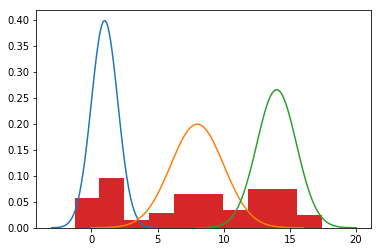

In [3]:
mean = [1, 8, 14]
sigma = [1, 2, 1.5]
np.random.seed(0)

gaussian_combination = list()
for mu, sig in zip(mean, sigma):
    plot_synthetic_data(mu, sig)
    gaussian_combination = np.concatenate((gaussian_combination, 
                                           np.random.normal(mu, sig, 1000)))

dataset = np.random.choice(gaussian_combination, 1000)
plt.hist(dataset, normed= 1)
plt.legend()
plt.show()

### 3) (i) KDE with Scipy:

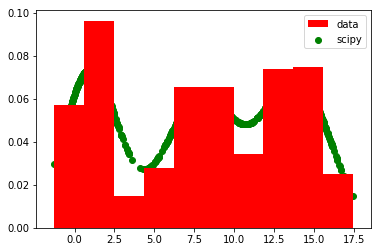

In [24]:
#x_grid = np.random.normal(-4, 3, 1000)
kde_scipy = stats.gaussian_kde(dataset)
pdf = kde_scipy.evaluate(dataset)
plt.hist(dataset, normed=1, color= 'r', label= 'data')
plt.scatter(dataset, pdf, color= 'g', label= 'scipy')
plt.legend()
plt.show()

### 3) (ii) Univariate KDE with Statsmodels:

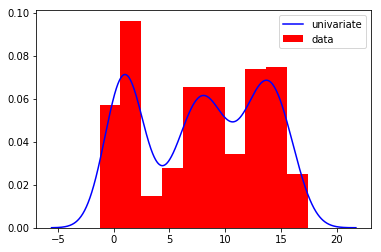

In [25]:
kde_univariate = KDEUnivariate(dataset)
kde_univariate.fit()
plt.hist(dataset, normed=1, color= 'r', label= 'data')
plt.plot(kde_univariate.support, kde_univariate.density, color= 'b', label= 'univariate')
plt.legend()
plt.show()

### 3) (iii) Multivariate KDE with Statsmodels:

/home/nareshguru77/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


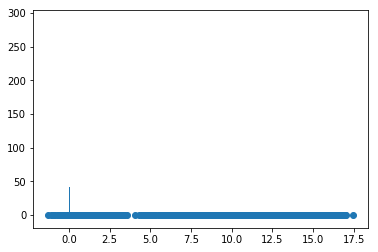

In [6]:
import statsmodels.api as sm

kde_multivariate = sm.nonparametric.KDEMultivariate(dataset, var_type= 'c')
predict_data = kde_multivariate.pdf(dataset)
#plt.hist(dataset, normed=1)
#plt.hist(kde_multivariate.pdf(dataset))
plt.hist(predict_data)
plt.scatter(dataset, predict_data)
plt.show()

### 3) (iv) KDE with Scikit-learn:

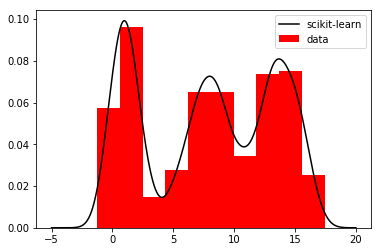

In [22]:
X_plot = np.linspace(-5, 20, 1000)[:, np.newaxis]
kde_skl = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(dataset.reshape(-1,1))
log_dens = kde_skl.score_samples(X_plot)
plt.hist(dataset, normed= 1, color= 'r', label= 'data')
plt.plot(X_plot[:, 0], np.exp(log_dens), color= 'k', label= 'scikit-learn')
plt.legend()
plt.show()

### 4) Plotting all four distributions on one figure:

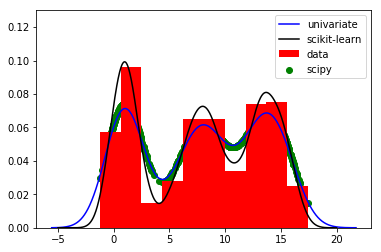

In [29]:
plt.hist(dataset, normed=1, color='r', label= 'data')
plt.scatter(dataset, pdf, color='g', label= 'scipy')
plt.plot(kde_univariate.support, kde_univariate.density, color='b', label= 'univariate')
plt.plot(X_plot[:, 0], np.exp(log_dens), color='k', label= 'scikit-learn')
plt.ylim(ymax= 0.13)
plt.legend()
plt.show()